![sutd](img/sutd.png)
## <center>50.040 Natural Language Processing, Summer 2019<center>
<center>**Mini Project**

<center>**Due 17 June 2019, 5pm** <center>

**Write your student ID and name**

ID: 1002088

Name: Chang Jun Qing

Students with whom you have discussed (if any): Reuben Ho, Koh Jing Yu

## Introduction

Language models are very useful for a wide range of applications, e.g., speech recognition and machine translation. Consider a sentence consisting of words $x_1, x_2, …, x_m$, where $m$ is the length of the sentence, the goal of language modeling is to model the probability of the sentence, where $m \geq 1$, $x_i \in V $ and $V$ is the vocabulary of the corpus:
$$p(x_1, x_2, …, x_m)$$
In this project, we are going to explore both statistical language model and neural language model on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) datasets.

## Statistical  Language Model

A simple way is to view words as independent random variables (i.e., zero-th order Markovian assumption). The joint probability can be written as:
$$p(x_1, x_2, …, x_m)=\prod_{i=1}^m p(x_i)$$
However, this model ignores the word order information, to account for which, under the first-order Markovian assumption, the joint probability can be written as:
$$p(x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-1})$$
Under the second-order Markovian assumption, the joint probability can be written as:
$$p(x_{-1}, x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-2}, x_{i-1})$$
Similar to what we did in HMM, we will assume that $x_{-1}=START, x_0=START, x_m = STOP$ in this definition, where $START, STOP$ are special symbols referring to the start and the end of a sentence.







### Parameter estimation

Let's use $count(u)$ to denote the number of times the unigram $u$ appears in the corpus, use $count(v, u)$ to denote the number of times the bigram $v, u$ appears in the corpus, and $count(w, v, u)$ the times the trigram $w, v, u$ appears in the corpus, $u \in V \cup STOP$ and $w, v \in V \cup START$.

And the parameters of the unigram, bigram and trigram models can be obtained using maximum likelihood estimation (MLE).

- In the unigram model, the parameters can be estimated as: $$p(u) = \frac {count(u)}{c}$$, where $c$ is the total number of words in the corpus.
- In the bigram model, the parameters can be estimated as:
$$p(u \mid v) = \frac{count(v, u)}{count(v)}$$
- In the trigram model, the parameters can be estimated as:
$$p(u \mid w, v) = \frac{count(w, v, u)}{count(w, v)}$$




### Smoothing the parameters
Note, it is likely that many parameters of bigram and trigram models will be 0 because the relevant bigrams and trigrams involved do not appear in the corpus. If you don't have a way to handle these 0 probabilities, all the sentences that include such bigrams or trigrams will have probabilities of 0.

We'll use a Add-k Smoothing method to fix this problem, the smoothed parameter can be estimated as:
$$p_{add-k}(u)= \frac{count(u)+k}{c+k|V^*|}$$
$$p_{add-k}(u \mid v)= \frac{count(v, u)+k}{count(v)+k|V^*|}$$
$$p_{add-k}(u \mid w, v)= \frac{count(w, v, u)+k}{count(w, v)+k|V^*|}$$

where $k \in (0, 1)$ is the parameter of this approach, and $|V^*|$ is the size of the vocabulary $V^*$,here $V^*= V \cup STOP$. One way to choose the value of $k$ is by
optimizing the perplexity of the development set, namely to choose the value that minimizes the perplexity.



### Perplexity

Given a test set $D^{\prime}$ consisting of sentences $X^{(1)}, X^{(2)}, …, X^{(|D^{\prime}|)}$, each sentence $X^{(j)}$ consists of words $x_1^{(j)}, x_2^{(j)},…,x_{n_j}^{(j)}$, we can measure the probability of each sentence $s_i$, and the quality of the language model would be the probability it assigns to the entire set of test sentences, namely:
$$\prod_j^{D^{\prime}}p(X^{(j)})$$
Let's define average log2 probability as:
$$l=\frac{1}{c^{\prime}}\sum_{j=1}^{|D^{\prime}|}log_2p(X^{(j)})$$
$c^{\prime}$ is the total number of words in the test set, $D^{\prime}$ is the number of sentences. And the perplexity is defined as:
$$perplexity=2^{-l}$$

The lower the perplexity, the better the language model.

#### Task 1 (4 points)
Remove the empty lines in the datasets, convert all the texts to lower cases, then compute counts of unigrams, bigrams, trigrams of the train corpus in the file "wiki.train.tokens". Do not take the START and STOP symbols into consideration for this task.
- List numbers of **unique** unigrams, bigrams and trigrams respectively.
- List 10 most frequent unigrams, bigrams and trigrams as well as their counts.

In [1]:
from collections import Counter, OrderedDict
from nltk import word_tokenize
from nltk import ngrams
import nltk
nltk.download('punkt')

from copy import deepcopy

wiki_train = 'data/wikitext-2/wiki.train.tokens'

all_words = []
with open(wiki_train, 'r') as f:
    for line in f:
        # We use split here so the <unk> does not get split into <, unk, > when using word_tokenize
        line_split = line.lower().split()
        if len(line_split) != 0:
            all_words += deepcopy(line_split)
    unigram = ngrams(all_words, 1)
    bigram = ngrams(all_words, 2)
    trigram = ngrams(all_words, 3)

unigram = Counter(unigram)
bigram = Counter(bigram)
trigram = Counter(trigram)

print('Unique Unigram: {}'.format(len(unigram.keys())))
print('Unique Bigram: {}'.format(len(bigram.keys())))
print('Unique Trigram: {}'.format(len(trigram.keys())))
print()
print('Most Frequent Unigram:\n{}'.format(unigram.most_common(10)))
print('Most Frequent Bigram:\n{}'.format(bigram.most_common(10)))
print('Most Frequent Trigram:\n{}'.format(trigram.most_common(10)))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junqingchang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Unique Unigram: 28911
Unique Bigram: 584839
Unique Trigram: 1376448

Most Frequent Unigram:
[(('the',), 130768), ((',',), 99913), (('.',), 73388), (('of',), 57030), (('<unk>',), 54625), (('and',), 50735), (('in',), 44982), (('to',), 39521), (('a',), 36156), (('=',), 29570)]
Most Frequent Bigram:
[(('=', '='), 17816), (('of', 'the'), 17284), (('.', 'the'), 13156), (('in', 'the'), 11800), ((',', 'and'), 11675), ((',', 'the'), 8034), (('<unk>', ','), 7707), (('to', 'the'), 6018), (('.', '='), 5025), (('.', 'in'), 4698)]
Most Frequent Trigram:
[(('=', '=', '='), 7254), (('.', '=', '='), 4604), ((',', 'and', 'the'), 1395), (('=', '=', 'the'), 1166), ((',', '<unk>', ','), 951), (('.', 'in', 'the'), 938), (('<unk>', ',', '<unk>'), 903), (('one', 'of', 'the'), 866), (('<unk>', ',', 'and'), 822), (('.', 'however', ','), 807)]


###### Task 2 (4 points)

Estimate the parameters for the bigram and trigram models through maximum-likelihood estimation respectively, compute the parameter for each n-gram in the file "ngram.txt", list down the n-grams that have 0 probability. 

Take the START and STOP symbols into consideration. For example, given a sentence "I like NLP", in a bigram model, we need to pad it as "START I like NLP STOP", in a trigram model, we need to pad it as "START START I like NLP STOP".

In [2]:
##Write your code here

wiki_train = 'data/wikitext-2/wiki.train.tokens'

ngram_file = 'data/ngram.txt'

all_words_2 = []
all_words_3 = []
with open(wiki_train, 'r') as f:
    for line in f:
        line_split = ['START']
        line_split += line.lower().split()
        line_split += ['STOP']
        if len(line_split) != 2:
            all_words_2 += deepcopy(line_split)
            all_words_3 += ['START'] + deepcopy(line_split)
    new_unigram = ngrams(all_words_2, 1)
    new_bigram = ngrams(all_words_3, 2)
    new_trigram = ngrams(all_words_3, 3)
    
new_unigram = Counter(new_unigram)
new_bigram = Counter(new_bigram)
new_trigram = Counter(new_trigram)
    
zeros = []                  
with open(ngram_file, 'r') as f:
    for line in f:
        line_split = line.lower().split()
        if len(line_split) == 2:
            div = new_unigram[(line_split[0],)]
            if div == 0:
                parameters = 0.0
            else:
                parameters = new_bigram[(line_split[0], line_split[1])]/ div
        if len(line_split) == 3:
            div = new_bigram[(line_split[0], line_split[1])]
            if div == 0:
                parameters = 0.0
            else:
                parameters = new_trigram[(line_split[0], line_split[1], line_split[2])]/ div
        if parameters == 0:
            zeros.append(line)
        print('ngram for - {}\n{}'.format(' '.join(line_split), parameters))
print('ngram with zeroes: {}'.format(zeros))

ngram for - the computer
9.941270035482687e-05
ngram for - go to
0.132013201320132
ngram for - have had
0.012680115273775217
ngram for - and the
0.08575933773529122
ngram for - can sea
0.0
ngram for - a number of
0.9573170731707317
ngram for - with respect to
0.5833333333333334
ngram for - in terms of
1.0
ngram for - not good bad
0.0
ngram for - first start with
0.0
ngram with zeroes: ['can sea\n', 'not good bad\n', 'first start with']


#### Task 3 (6 points)
Use the Add-k smoothing method to smooth parameters of bigram and trigram models respectively, choose the parameter $k$ from the set {0.1, 0.3, 0.5, 0.7, 0.9} on the development set for each model. Compute the smoothed parameters of n-grams in the file "ngram.txt". The development data is in the file "wiki.valid.tokens".

In [3]:
##Write your code here
import sys
import math

def smoothed_parameter(line_split, k, new_unigram, new_bigram, new_trigram):
    if len(line_split) == 2:
        parameters = (new_bigram[(line_split[0], line_split[1])]+k)/ (new_unigram[(line_split[0],)] + k*(len(new_unigram.keys())-1))
    if len(line_split) == 3:
        parameters = (new_trigram[(line_split[0], line_split[1], line_split[2])]+k)/ (new_bigram[(line_split[0], line_split[1])]+k*(len(new_unigram.keys())-1))
    
    return parameters

k_val = [0.1,0.3,0.5,0.7,0.9]

wiki_val = 'data/wikitext-2/wiki.valid.tokens'

best_bi_k = k_val[0]
best_tri_k = k_val[0]
best_bi_p = sys.maxsize
best_tri_p = sys.maxsize

for k in k_val:
    bi_p = 0
    tri_p = 0
    wc = 0
    
    with open(wiki_val, 'r') as f:
        for line in f:
            line_split = line.lower().split()
            wc += len(line_split)
            if len(line_split) != 0:
                twogram = ngrams(['START']+ line_split+['STOP'], 2)
                threegram = ngrams(['START', 'START'] + line_split + ['STOP'], 3)
                for gram in twogram:
                    bi_p += math.log(smoothed_parameter(gram, k, new_unigram, new_bigram, new_trigram),2)
                for gram in threegram:
                    tri_p += math.log(smoothed_parameter(gram, k, new_unigram, new_bigram, new_trigram),2)
        bi_p = 2**(-bi_p/wc)
        tri_p = 2**(-tri_p/wc)
        if bi_p < best_bi_p:
            best_bi_p = bi_p
            best_bi_k = k
        if tri_p < best_tri_p:
            best_tri_p = tri_p
            best_tri_k = k
        print('k val: {}\nBigram Perplexity: {}\nTrigram Perplexity: {}'.format(k, bi_p, tri_p))
print()
print('Best bigram k: {}, Best bigram score: {}\nBest trigram k: {}, Best trigram score: {}'.format(best_bi_k, best_bi_p, best_tri_k, best_tri_p))
                
    
print()
with open(ngram_file, 'r') as f:
    for line in f:
        line_split = line.lower().split()
        parameters = smoothed_parameter(line_split, best_bi_k, new_unigram, new_bigram, new_trigram)
        print('Parameter for - {}\n{}'.format(' '.join(line_split), parameters))
            

k val: 0.1
Bigram Perplexity: 801.6838033087178
Trigram Perplexity: 5667.857866972873
k val: 0.3
Bigram Perplexity: 1146.6665132817234
Trigram Perplexity: 7951.1543998312945
k val: 0.5
Bigram Perplexity: 1392.9508977844434
Trigram Perplexity: 9355.385615247322
k val: 0.7
Bigram Perplexity: 1597.550332309939
Trigram Perplexity: 10402.547270631849
k val: 0.9
Bigram Perplexity: 1777.293346480934
Trigram Perplexity: 11244.483077620798

Best bigram k: 0.1, Best bigram score: 801.6838033087178
Best trigram k: 0.1, Best trigram score: 5667.857866972873

Parameter for - the computer
9.80104624298215e-05
Parameter for - go to
0.012554004132490137
Parameter for - have had
0.006932654216185625
Parameter for - and the
0.08113757827330671
Parameter for - can sea
2.3746200607902732e-05
Parameter for - a number of
0.09757082504970178
Parameter for - with respect to
0.002445577294020391
Parameter for - in terms of
0.0213594204860876
Parameter for - not good bad
3.456380478363058e-05
Parameter for - fi

#### Task 4 (4 points)

Use the smoothed bigram and trigram models to compute the perplexity of the test set in the file  "wiki.test.tokens" respectively. Which model has a lower perplexity?

In [4]:
##Write your code here
wiki_test = 'data/wikitext-2/wiki.test.tokens'
bi_p = 0
tri_p = 0
wc = 0
with open(wiki_test, 'r') as f:
    for line in f:
        line_split = line.lower().split()
        wc += len(line_split)
        if len(line_split) != 0:
            twogram = ngrams(['START']+ line_split+['STOP'], 2)
            threegram = ngrams(['START', 'START'] + line_split + ['STOP'], 3)
            for gram in twogram:
                bi_p += math.log(smoothed_parameter(gram, best_bi_k, new_unigram, new_bigram, new_trigram),2)
            for gram in threegram:
                tri_p += math.log(smoothed_parameter(gram, best_tri_k, new_unigram, new_bigram, new_trigram),2)
    bi_p = 2**(-bi_p/wc)
    tri_p = 2**(-tri_p/wc)
    print('k val: {}\nBigram Perplexity: {}\nTrigram Perplexity: {}'.format(best_bi_k, bi_p, tri_p))

k val: 0.1
Bigram Perplexity: 749.0917589196847
Trigram Perplexity: 5313.416812731757


## Neural Language Model

Using the chain rule, the probability of a sentence consisting of words $x_1, x_2, ..., x_n$ can be represented as:

$$p(x_1, x_2, ..., x_n) = \prod_{i=1}^n p(x_t \mid x_{t-1}, ..., x_1)$$

Assume that we can use a hidden vector $h_t\in R^d$ of a recurrent neural network (RNN) to record the history information of words:
$$h_t = RNN(x_t, h_{t-1})$$

The conditional probability of word $x_{t+1}$ can be parameterized as:
$$p(x_{t+1} \mid x_{t}, x_{t-1}, ..., x_1) \propto exp(f(w_{x_{t+1}}h_{t}))$$

$d$ is the dimension size of the hidden layer, $|V|$ is the size of the vocabulary. $f$ is a fully-connected layer, where $w \in R^{|V| \times d}$ are the parameters, $w_{x_{t+1}}$ is the parameter in the row that corresponds to the index of $x_{t+1}$ in the vocabulary, the bias is omitted. 



#### Task 5 (12 points)
We will create a LSTM language model, and train it on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) dataset. The data generators(train_iter, valid_iter, test_iter) and the LSTM model(in the file "lstm\_model.py") have been provided. The word embeddings together with the parameters in the LSTM model will be learned from scratch.
Our tasks:
- Complete the training and evaluating code, tune hyperparameters on the validation data, then compute the perplexity of the test data. The test perplexity should be below 150. (5 points)
- Visualize word embeddings trained by our language model as in Homework 1, try to find patterns, i.e., are similar words clustering? (2 points)
- Implement a 2-layer bidirectional LSTM language model as shown in Fig 1, train the language model from both directions, compute the perplexity of the test data for each direction. Note, the forward and backward LSTMs do not share parameters, and the outputs from the previous layer can be only passed to the next layer in the same direction. (5 points)
![bilstm](img/bilstm.png)

<center>Fig 1: 2-layer Bidirectionl LSTM Language Model Architecture

The START and STOP symbols have been added to the sentences in the generators, and the second dimension of the outputs of generators is the index of the batch.

[Pytorch](https://pytorch.org/tutorials/) is required in this part. Do not make any changes to the provided code unless you are requested to do so. 

In [5]:
#load packages
import torchtext
import torch
from torchtext.datasets import WikiText2
from torch import nn, optim
from torchtext import data
from nltk import word_tokenize
from lstm_model import LSTMModel
torch.manual_seed(222)

In [6]:
def tokenizer(text):
    '''Tokenize a string to words'''
    return word_tokenize(text)

#Load and split data into three parts
TEXT = data.Field(lower=True, tokenize=tokenizer, init_token='<sos>')
train, valid, test = WikiText2.splits(TEXT) 

In [7]:
#Build a vocabulary from the train dataset
TEXT.build_vocab(train)
print('Vocabulary size:', len(TEXT.vocab))

Vocabulary size: 28904


In [8]:
#Create data generators
BATCH_SIZE = 64
BPTT_LEN = 32#the length of a text feeding to the RNN layer
train_iter, valid_iter, test_iter = data.BPTTIterator.splits(
    (train, valid, test),
    batch_size=BATCH_SIZE,
    bptt_len=BPTT_LEN,
    repeat=False)

In [9]:
len(train_iter)

1096

In [10]:
#Generate a batch of train data
batch = next(iter(train_iter))
text, target = batch.text, batch.target

In [11]:
print('Size of text tensor',text.size())
print('Size of target tensor',target.size())

Size of text tensor torch.Size([32, 64])
Size of target tensor torch.Size([32, 64])


In [13]:
##Write your code here
emb_size = [64,128,256]
hidden_size = [64,128,256]
dropout_p = [0.2,0.3,0.4,0.5]
num_layer_ls = [2]
learning_rate = 0.01
epochs = 30

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

def train(train_iter, model, optimizer, criterion, BATCH_SIZE, device):
    model.train()
    total_loss = 0   
    for batch in iter(train_iter):
        optimizer.zero_grad()
        data, target = batch.text.to(device), batch.target.to(device)
        hidden = model.init_hidden(BATCH_SIZE)
        output, hidden = model(data, hidden)
        output = torch.transpose(output, 1, 2)
        loss = criterion(output, target)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss/len(train_iter)

def test(test_iter, model, criterion, BATCH_SIZE, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in iter(test_iter):
            data, target = batch.text.to(device), batch.target.to(device)
            hidden = model.init_hidden(BATCH_SIZE)
            output, hidden = model(data, hidden)
            output = torch.transpose(output, 1, 2)
            loss = criterion(output, target)
            total_loss += loss.item()
    return total_loss/len(test_iter), math.exp(total_loss/len(test_iter))

best_params = {'emb_size':emb_size[0], 'hidden_size':hidden_size[0], 'dropout':dropout_p[0], 'num_layer':num_layer_ls[0]}
best_loss = sys.maxsize

for num_layer in num_layer_ls:
    for emb in emb_size:
        for h_size in hidden_size:
            for dropout in dropout_p:
                print('EmbedSize: {}, HiddenSize: {}, Dropout: {}, Layers: {}'.format(emb, h_size, dropout, num_layer))
                early_stop = 0
                early_stop_loss = sys.maxsize
                model = LSTMModel(len(TEXT.vocab), emb, h_size, num_layer, dropout)
                model.to(device)
                optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
                criterion = torch.nn.NLLLoss()
                for epoch in range(1,epochs+1):
                    train_loss= train(train_iter, model, optimizer, criterion, BATCH_SIZE, device)
                    val_loss, perplexity = test(valid_iter, model, criterion, BATCH_SIZE, device)
                    print('Epoch {}, Training Loss: {}, Validation Loss: {}'.format(epoch, train_loss, val_loss))
                    if val_loss < early_stop_loss:
                        early_stop_loss = val_loss
                        early_stop = 0
                    else:
                        early_stop += 1
                        if early_stop == 2:
                            print('Early stopping')
                            print()
                            break
                    if val_loss < best_loss:
                        best_loss = val_loss
                        best_params = {'emb_size':emb, 'hidden_size':h_size, 'dropout':dropout, 'num_layer':num_layer}
                        print('Found better model')
                        best_model_wts = model.state_dict()
                        torch.save(best_model_wts,'best_model.pt')


EmbedSize: 64, HiddenSize: 64, Dropout: 0.2, Layers: 2
Epoch 1, Training Loss: 6.317386197347711, Validation Loss: 5.216420827818311
Found better model
Epoch 2, Training Loss: 5.5087480127376365, Validation Loss: 4.9866791638461025
Found better model
Epoch 3, Training Loss: 5.305496566922125, Validation Loss: 4.89095863626023
Found better model
Epoch 4, Training Loss: 5.190698176839926, Validation Loss: 4.849231235251939
Found better model
Epoch 5, Training Loss: 5.115566529931813, Validation Loss: 4.826877318137933
Found better model
Epoch 6, Training Loss: 5.061384649172316, Validation Loss: 4.810163734372982
Found better model
Epoch 7, Training Loss: 5.018401139844073, Validation Loss: 4.807236805435054
Found better model
Epoch 8, Training Loss: 4.983671743069252, Validation Loss: 4.798899012163651
Found better model
Epoch 9, Training Loss: 4.95136061724085, Validation Loss: 4.796379621363869
Found better model
Epoch 10, Training Loss: 4.923578030436579, Validation Loss: 4.790126926

Epoch 1, Training Loss: 6.145326202803284, Validation Loss: 5.0828472326609715
Epoch 2, Training Loss: 5.385602960621354, Validation Loss: 4.873977826646537
Epoch 3, Training Loss: 5.168009645747443, Validation Loss: 4.774795394298459
Epoch 4, Training Loss: 5.038184826391457, Validation Loss: 4.73213005065918
Found better model
Epoch 5, Training Loss: 4.953284473314772, Validation Loss: 4.711216087183677
Found better model
Epoch 6, Training Loss: 4.890904671954413, Validation Loss: 4.695033971928368
Found better model
Epoch 7, Training Loss: 4.842884833795311, Validation Loss: 4.688696518417232
Found better model
Epoch 8, Training Loss: 4.801662743961724, Validation Loss: 4.674837557737493
Found better model
Epoch 9, Training Loss: 4.768784641349403, Validation Loss: 4.6719346204079875
Found better model
Epoch 10, Training Loss: 4.741194185984396, Validation Loss: 4.67615916118149
Epoch 11, Training Loss: 4.718060492164027, Validation Loss: 4.670854718231958
Found better model
Epoch 1

Epoch 4, Training Loss: 5.173698607152396, Validation Loss: 4.845975998019384
Epoch 5, Training Loss: 5.103520018775968, Validation Loss: 4.824602194068846
Epoch 6, Training Loss: 5.05121009584761, Validation Loss: 4.819694278653988
Epoch 7, Training Loss: 5.0097079612042785, Validation Loss: 4.8095024912810524
Epoch 8, Training Loss: 4.975945792494029, Validation Loss: 4.8074025240811435
Epoch 9, Training Loss: 4.944337337556546, Validation Loss: 4.803879075799107
Epoch 10, Training Loss: 4.917231668521018, Validation Loss: 4.806035467415802
Epoch 11, Training Loss: 4.895834800970816, Validation Loss: 4.804326916529128
Early stopping

EmbedSize: 128, HiddenSize: 64, Dropout: 0.3, Layers: 2
Epoch 1, Training Loss: 6.346453225960697, Validation Loss: 5.228684977066418
Epoch 2, Training Loss: 5.583943069416241, Validation Loss: 5.023130085842668
Epoch 3, Training Loss: 5.415408264981569, Validation Loss: 4.943280531355172
Epoch 4, Training Loss: 5.324907787959941, Validation Loss: 4.9017

Epoch 8, Training Loss: 4.997397594208265, Validation Loss: 4.72895646292316
Epoch 9, Training Loss: 4.969007488149796, Validation Loss: 4.720934631410709
Epoch 10, Training Loss: 4.945443372221758, Validation Loss: 4.722452806047172
Epoch 11, Training Loss: 4.92619533956486, Validation Loss: 4.724380374939973
Early stopping

EmbedSize: 128, HiddenSize: 128, Dropout: 0.5, Layers: 2
Epoch 1, Training Loss: 6.316006321106514, Validation Loss: 5.191413575952703
Epoch 2, Training Loss: 5.614822620457977, Validation Loss: 4.996020640223479
Epoch 3, Training Loss: 5.451783675346931, Validation Loss: 4.908505936299473
Epoch 4, Training Loss: 5.359638223247806, Validation Loss: 4.852872253449495
Epoch 5, Training Loss: 5.294413710162587, Validation Loss: 4.818931524418602
Epoch 6, Training Loss: 5.2463186813967075, Validation Loss: 4.794862975758955
Epoch 7, Training Loss: 5.207587670670809, Validation Loss: 4.7805503143751915
Epoch 8, Training Loss: 5.17639148191814, Validation Loss: 4.762938

Epoch 12, Training Loss: 5.250280371982686, Validation Loss: 4.853064261192133
Epoch 13, Training Loss: 5.239641327057441, Validation Loss: 4.850305923745652
Epoch 14, Training Loss: 5.23071723219252, Validation Loss: 4.847531137387614
Epoch 15, Training Loss: 5.222471184539099, Validation Loss: 4.845119961037123
Epoch 16, Training Loss: 5.2150519529398345, Validation Loss: 4.842106614231078
Epoch 17, Training Loss: 5.209289969754045, Validation Loss: 4.841320900877645
Epoch 18, Training Loss: 5.202675325592069, Validation Loss: 4.8367054639769
Epoch 19, Training Loss: 5.195668656025489, Validation Loss: 4.842363578228911
Epoch 20, Training Loss: 5.191063877004776, Validation Loss: 4.831740493616782
Epoch 21, Training Loss: 5.185851537398178, Validation Loss: 4.833920112326125
Epoch 22, Training Loss: 5.182859624824385, Validation Loss: 4.836046971565436
Early stopping

EmbedSize: 256, HiddenSize: 64, Dropout: 0.5, Layers: 2
Epoch 1, Training Loss: 6.546994102697303, Validation Loss: 5

Epoch 8, Training Loss: 4.6236672923512705, Validation Loss: 4.6888492718215815
Early stopping

EmbedSize: 256, HiddenSize: 256, Dropout: 0.4, Layers: 2
Epoch 1, Training Loss: 5.874749118829295, Validation Loss: 4.951272550693228
Epoch 2, Training Loss: 5.275683785006947, Validation Loss: 4.802532810810184
Epoch 3, Training Loss: 5.108936859308368, Validation Loss: 4.728735025264015
Epoch 4, Training Loss: 5.00274684350856, Validation Loss: 4.692230185201345
Epoch 5, Training Loss: 4.923896615522621, Validation Loss: 4.673082253164496
Epoch 6, Training Loss: 4.861429365882038, Validation Loss: 4.669662684448494
Epoch 7, Training Loss: 4.812065821929569, Validation Loss: 4.680544585235848
Epoch 8, Training Loss: 4.772883498320614, Validation Loss: 4.68399535722969
Early stopping

EmbedSize: 256, HiddenSize: 256, Dropout: 0.5, Layers: 2
Epoch 1, Training Loss: 6.102722613045769, Validation Loss: 5.06060991996576
Epoch 2, Training Loss: 5.446812932943776, Validation Loss: 4.8872956480861

In [14]:
print('Best Parameters, {}'.format(best_params))
model = LSTMModel(len(TEXT.vocab), best_params['emb_size'], best_params['hidden_size'], best_params['num_layer'], best_params['dropout'])
model.to(device)
model.load_state_dict(torch.load('best_model.pt', map_location=device))
test_loss, perplexity = test(test_iter, model, criterion, BATCH_SIZE, device)
print('Test Perplexity on Best Model: {}'.format(perplexity))

Best Parameters, {'emb_size': 64, 'hidden_size': 256, 'dropout': 0.4, 'num_layer': 2}
Test Perplexity on Best Model: 87.05003435430987


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


#Visualize the transformed word embeddings and annotate them with words.
def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(15,15))  # in inches
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                       ha='right', va='bottom')
        
emb_weights = model.encoder.weight.detach().cpu().numpy()[:300]
pca=PCA(n_components=2)
pca.fit(emb_weights)
two_d_embeddings = pca.transform(emb_weights)
labels = [keys for keys in TEXT.vocab.stoi][:300]

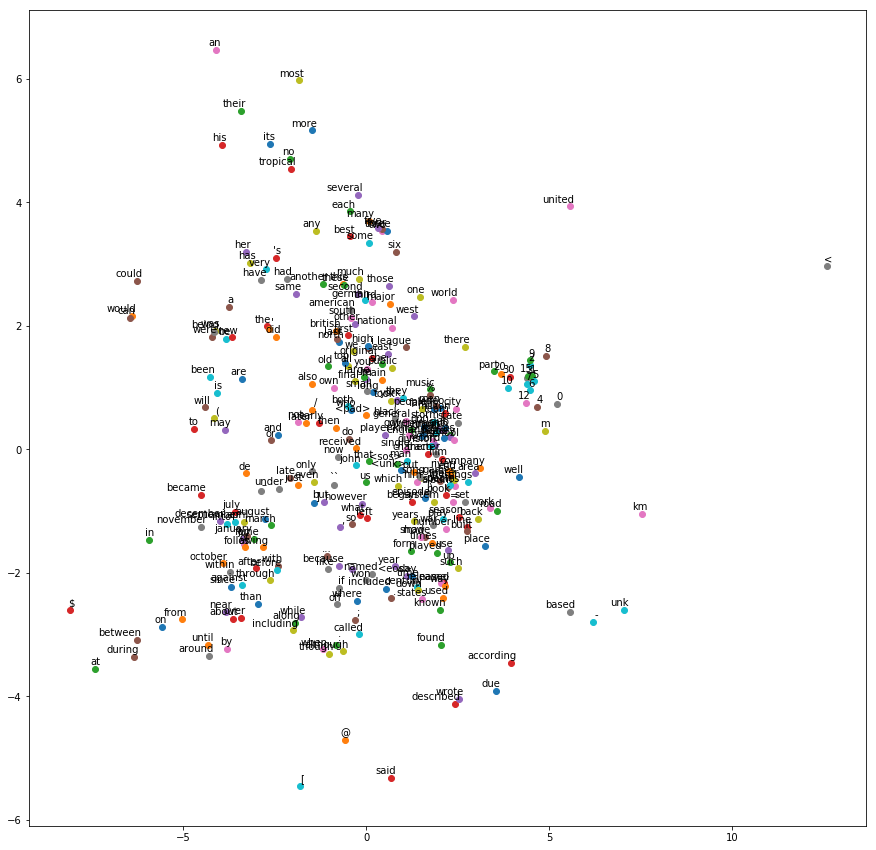

In [27]:
plot(two_d_embeddings, labels[:500])

I took the first 300 words in the vocab as having too much words will kill the kernel and it also will be a very small plot and things cannot be observed.

In this plot we can see some of the clusters. For example the numbers are all in a cluster. connecting words like been, are, is, will, to, may are also in a cluster. 

In [28]:
# Part 3 Bidirectional LSTM
#load packages
import torchtext
import torch
from torchtext.datasets import WikiText2
from torch import nn, optim
from torchtext import data
from nltk import word_tokenize
from lstm_model import LSTMModel
torch.manual_seed(222)
import numpy as np
import sys

def tokenizer(text):
    '''Tokenize a string to words'''
    return word_tokenize(text)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

#Load and split data into three parts
TEXT = data.Field(lower=True, tokenize=tokenizer, init_token='<sos>')
train, valid, test = WikiText2.splits(TEXT)

#Build a vocabulary from the train dataset
TEXT.build_vocab(train)
print('Vocabulary size:', len(TEXT.vocab))

#Create data generators
BATCH_SIZE = 64
BPTT_LEN = 32#the length of a text feeding to the RNN layer
train_iter, valid_iter, test_iter = data.BPTTIterator.splits(
    (train, valid, test),
    batch_size=BATCH_SIZE,
    bptt_len=BPTT_LEN,
    repeat=False)

forwardmodel = LSTMModel(len(TEXT.vocab), best_params['emb_size'], best_params['hidden_size'], best_params['num_layer'], best_params['dropout'])
forwardmodel.to(device)
forwardmodel.load_state_dict(torch.load('best_model.pt', map_location=device))

Vocabulary size: 28904


In [30]:
import math
def backward_train(train_iter, model, optimizer, criterion, BATCH_SIZE, device):
    model.train()
    total_loss = 0   
    for batch in iter(train_iter):
        optimizer.zero_grad()
        data, target = torch.flip(batch.text, (0,1)).to(device),torch.flip(batch.target, (0,1)).to(device)
        hidden = model.init_hidden(BATCH_SIZE)
        output, hidden = model(target, hidden)
        output = torch.transpose(output, 1, 2)
        loss = criterion(output, data)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss/len(train_iter)

def backward_test(test_iter, model, criterion, BATCH_SIZE, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in iter(test_iter):
            data, target = torch.flip(batch.text, (0,1)).to(device),torch.flip(batch.target, (0,1)).to(device)
            hidden = model.init_hidden(BATCH_SIZE)
            output, hidden = model(target, hidden)
            output = torch.transpose(output, 1, 2)
            loss = criterion(output, data)
            total_loss += loss.item()
    return total_loss/len(test_iter), math.exp(total_loss/len(test_iter))

def test(test_iter, model, criterion, BATCH_SIZE, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in iter(test_iter):
            data, target = batch.text.to(device), batch.target.to(device)
            hidden = model.init_hidden(BATCH_SIZE)
            output, hidden = model(data, hidden)
            output = torch.transpose(output, 1, 2)
            loss = criterion(output, target)
            total_loss += loss.item()
    return total_loss/len(test_iter), math.exp(total_loss/len(test_iter))

backwardmodel = LSTMModel(len(TEXT.vocab), best_params['emb_size'], best_params['hidden_size'], best_params['num_layer'], best_params['dropout'])
backwardmodel.to(device)

learning_rate = 0.01
epochs = 30

optimizer = torch.optim.Adam(backwardmodel.parameters(), lr=learning_rate)
criterion = torch.nn.NLLLoss()


best_loss = sys.maxsize
for epoch in range(1, epochs+1):
    train_loss = backward_train(train_iter, backwardmodel, optimizer, criterion, BATCH_SIZE, device)
    val_loss, perplexity = backward_test(valid_iter, backwardmodel, criterion, BATCH_SIZE, device)
    print('Epoch {}, Training Loss: {}, Validation Loss: {}'.format(epoch, train_loss, val_loss))
    if val_loss < best_loss:
        best_loss = val_loss
        best_model_wts = backwardmodel.state_dict()
        torch.save(best_model_wts,'best_backward_model.pt')
        




Epoch 1, Training Loss: 6.0319618852469175, Validation Loss: 4.998859543445682
Epoch 2, Training Loss: 5.321410894393921, Validation Loss: 4.815069052798689
Epoch 3, Training Loss: 5.11800326396079, Validation Loss: 4.720733918434332
Epoch 4, Training Loss: 4.989638044016204, Validation Loss: 4.668076069887019
Epoch 5, Training Loss: 4.900097603345439, Validation Loss: 4.643905210100915
Epoch 6, Training Loss: 4.8307648270669645, Validation Loss: 4.6299815532589745
Epoch 7, Training Loss: 4.776480699977736, Validation Loss: 4.616586271396353
Epoch 8, Training Loss: 4.73137386393373, Validation Loss: 4.621101903521325
Epoch 9, Training Loss: 4.691921807118576, Validation Loss: 4.631467066520502
Epoch 10, Training Loss: 4.659688068132331, Validation Loss: 4.63268391948101
Epoch 11, Training Loss: 4.633263526606734, Validation Loss: 4.632347059643958
Epoch 12, Training Loss: 4.608368203152705, Validation Loss: 4.627040130047758
Epoch 13, Training Loss: 4.585870775428131, Validation Loss: 

In [31]:
backwardmodel = LSTMModel(len(TEXT.vocab), best_params['emb_size'], best_params['hidden_size'], best_params['num_layer'], best_params['dropout'])
backwardmodel.to(device)
backwardmodel.load_state_dict(torch.load('best_backward_model.pt', map_location=device))

In [32]:
test_loss, perplexity = test(test_iter, forwardmodel, criterion, BATCH_SIZE, device)
print('Forward Model Perplexity: {}'.format(perplexity))
test_loss, perplexity = backward_test(test_iter, backwardmodel, criterion, BATCH_SIZE, device)
print('Backward Model Perplexity: {}'.format(perplexity))

Forward Model Perplexity: 87.05003405352225
Backward Model Perplexity: 87.99637494773917


#### Task 6 (Optional, 6 points)
We can train our 2-layer bidirectional LSTM language model on a relatively large dataset [wikitext-103](https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-v1.zip) and explore some interesting characteristics of the model. Our tasks:
- Generate a piece of text ending with the STOP symbol but no more than 50 words given the START symbol, check whether it is fluent or not based on your tuition.
- Feed each sentence of the movie reviews in homework 1 to our language model, concatenate the outputs of forward and backward LSTMs as the contextualized embedding for each word in the sentence.
- Train the provided RNN Classifier in homework 1 based on the contextualized word embeddings of the train set, tune parameters on the development set and evaluate the performances on the test set.
- Consider “play”, a highly polysemous word, find 20 sentences including "play", half of them refer to the verb, and half of them refer to the noun. Visualize the contextualized embeddings of "play" in the sentences, check whether the embeddings can capture the contextual information or not.

References: 

- [EXPLORING THE LIMITS OF LANGUAGE MODELING](https://arxiv.org/pdf/1602.02410.pdf)
- [IMPROVING NEURAL LANGUAGE MODELS WITH A CONTINUOUS CACHE](https://arxiv.org/pdf/1612.04426.pdf)
- [LEARNING LONGER MEMORY IN RECURRENT NEURAL NETWORKS](https://arxiv.org/pdf/1412.7753.pdf)

In [ ]:
# Refer to Optional ipynb

### Requirements:
- This is an individual report.
- Complete the code using Python.
- List students with whom you have discussed if there are any.
- Follow the honor code strictly.

### Free GPU Resources
We suggest that you run neural language models on machines with GPU(s). Google provides the free online platform [Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb), a research tool for machine learning education and research. It’s a Jupyter notebook environment that requires no setup to use as common packages have been  pre-installed. Google users can have access to a Tesla T4 GPU (approximately 15G memory). Note that when you connect to a GPU-based VM runtime, you are given a maximum of 12 hours at a time on the VM.

It is convenient to upload local Jupyter Notebook files and data to Colab, please refer to the [tutorial](https://colab.research.google.com/notebooks/io.ipynb). 

In addition, Microsoft also provides the online platform [Azure Notebooks](https://notebooks.azure.com/help/introduction) for research of data science and machine learning, there are free trials for new users with credits.